In [27]:
%matplotlib inline
import matplotlib as mpl
font_cache_path = mpl.get_cachedir() + '/fontList.cache'
%rm $font_cache_path
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

import pandas as pd

rm: /Users/arimuraterutoshi/.matplotlib/fontList.cache: No such file or directory


In [9]:
# あやめの機械学習用データをcsv形式で読み込む
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [10]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

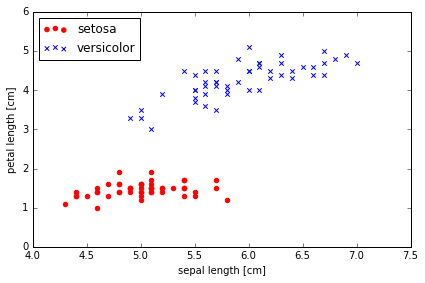

In [11]:
# setosaとversicolorで目的変数を区別
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# epal lengthとpetal lengthをXに格納
X = df.iloc[0:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('./images/02_06.png', dpi=300)
plt.show()



# 動作確認

In [28]:
# 平均0の分散1になるように事前処理を行う
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

In [46]:
# 事前処理された入力データの確認
X_std[:3]

array([[-0.5810659 , -1.01435952],
       [-0.89430898, -1.01435952],
       [-1.20755205, -1.08374115]])

In [105]:
# パラメータを初期化
w_ = np.zeros(1 + X_std.shape[1])
w_

array([ 0.,  0.,  0.])

In [106]:
# それぞれの入力に対して順伝搬で計算
activate = np.dot(X_std, w_[1:]) + w_[0]

# 予測結果を格納
predict = np.where(activate >= 0.0, 1, -1)

In [107]:
# 誤差を取得
errors = (y - predict)

# 各トレーニングデータの誤差に対してパラメータをかけて合計したものに学習率をかけたものをパラメータ更新に使用する
nabParam = 0.1 * X_std.T.dot(errors)

In [108]:
# パラメータの更新
w_[1:] += nabParam
w_[0] += 0.1 * errors.sum()
print(w_)
print(errors.sum())

[-10.           7.28290149   9.6995527 ]
-100


In [109]:
# 20回ほど繰り返して学習
for i in range(20):
    activate = np.dot(X_std, w_[1:]) + w_[0]
    predict = np.where(activate >= 0.0, 1, -1)
    errors = (y - predict)
    nabParam = 0.1 * X_std.T.dot(errors)
    w_[1:] += nabParam
    w_[0] += 0.1 * errors.sum()
    print(str(i) + ":" + str(errors.sum()))

0:26
1:16
2:8
3:8
4:8
5:8
6:6
7:6
8:4
9:2
10:2
11:2
12:2
13:2
14:0
15:0
16:0
17:0
18:0
19:0


In [20]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
         学習率 0 ~ 1
    n_iter : int
        トレーニング回数

    Attributes
    -----------
    w_ : 1d-array
        パラメータ
    cost_ : list
        誤差の二乗ノルム

    """
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            トレーニングの入力データ
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            トレーニングの目的変数

        Returns
        -------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            # net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression, we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            # 活性化関数の出力の計算
            output = self.activation(X)
            # 誤差を算出
            errors = (y - output)
            # パラメータの更新
            self.w_[1:] += self.eta * X.T.dot(errors)
            # バイアスも更新
            self.w_[0] += self.eta * errors.sum()
            # 誤差の二乗ノルム
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)


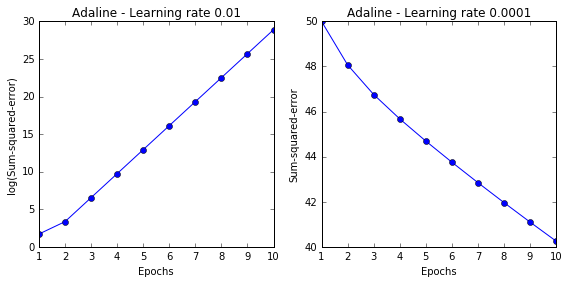

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

plt.tight_layout()
# plt.savefig('./adaline_1.png', dpi=300)
plt.show()

In [22]:
# standardize features
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

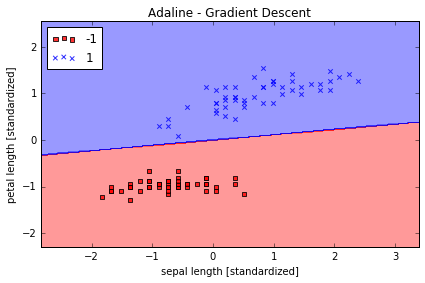

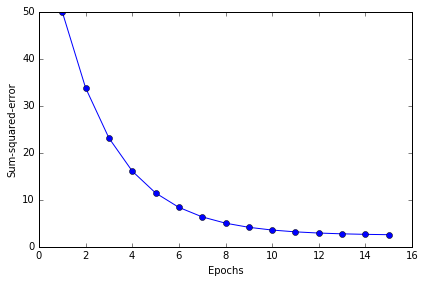

In [23]:
ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('./adaline_2.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()
# plt.savefig('./adaline_3.png', dpi=300)
plt.show()

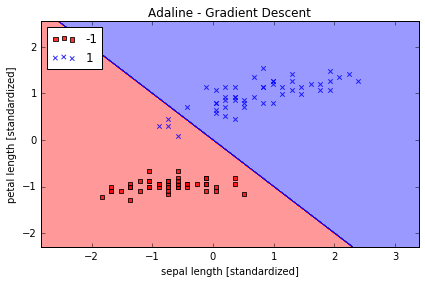

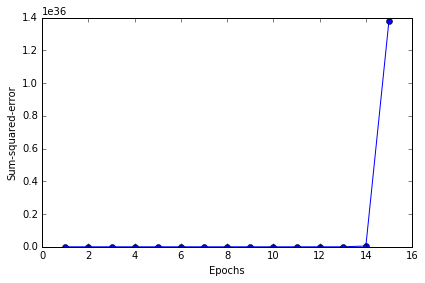

In [24]:
# 学習率が大きいと最終的にエラーが増える
ada = AdalineGD(n_iter=15, eta=0.1)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('./adaline_2.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()
# plt.savefig('./adaline_3.png', dpi=300)
plt.show()


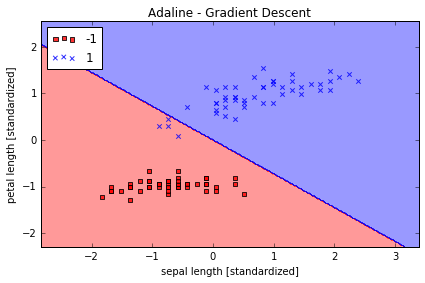

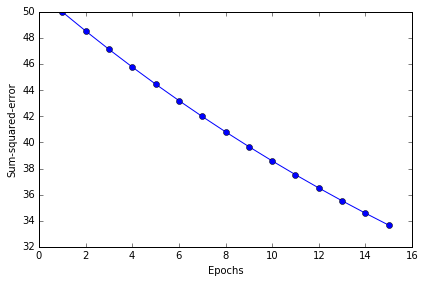

In [26]:
# 学習率が小さいと学習が進むのが遅い
ada = AdalineGD(n_iter=15, eta=0.0001)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('./adaline_2.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()
# plt.savefig('./adaline_3.png', dpi=300)
plt.show()